In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\lmgv\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


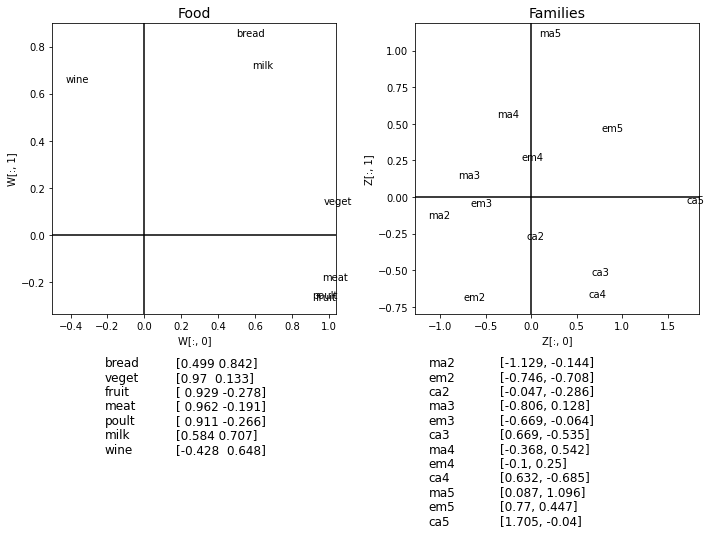

In [2]:
x = pd.read_csv("food.dat", sep = "\s+", header=None)

x = x.iloc[:, 1:len(x.columns)]
one = np.full((len(x), len(x)), 1)
h = np.diag([1]*len(x)) - one/len(x)
a = x - np.tile(np.array(x.mean()), (len(x), 1))
d = np.diag(1/np.sqrt(np.sum(a**2)/len(x)))

xs = h @ x @ d
xs1 = xs/np.sqrt(len(x))
xs2 = xs1.T @ xs1

Lambda, gamma = np.linalg.eig(xs2)
w = gamma * np.tile(np.sqrt(Lambda), (len(gamma), 1))
w = np.round(w[:, :2], 3)

z1 = xs1 @ gamma
z2 = np.sqrt(len(x)/len(x.columns)) * z1
z = np.round(z2.iloc[:, :2], 3)

namew = ["bread", "veget", "fruit", "meat", "poult", "milk", "wine"]
namez = ["ma2", "em2", "ca2", "ma3", "em3", "ca3", "ma4", "em4", "ca4", "ma5", "em5", 
         "ca5"]

fig, axes = plt.subplots(1, 2, figsize = (10, 5))

axes[0].scatter(w[:, 0], w[:, 1], c = "w")
for i in range(0, len(namew)):
    axes[0].text(w[i, 0], w[i, 1], namew[i])

axes[0].set_xlabel("W[:, 0]")
axes[0].set_ylabel("W[:, 1]")
axes[0].axvline(0, c = "k")
axes[0].axhline(0, c = "k")
axes[0].set_title("Food", fontsize = 14)
for i in range(0, len(namew)):
    fig.text(0.15, -0.03-(0.04*i), namew[i], fontsize = 12)
    fig.text(0.25, -0.03-(0.04*i), w[i], fontsize = 12)
    
axes[1].scatter(z.iloc[:, 0], z.iloc[:, 1], c = "w")
for i in range(0, len(namez)):
    axes[1].text(z.iloc[i, 0], z.iloc[i, 1], namez[i])

axes[1].set_xlabel("Z[:, 0]")
axes[1].set_ylabel("Z[:, 1]")
axes[1].axvline(0, c = "k")
axes[1].axhline(0, c = "k")
axes[1].set_title("Families", fontsize = 14)
for i in range(0, len(namez)):
    fig.text(0.6, -0.03-(0.04*i), namez[i], fontsize = 12)
    fig.text(0.7, -0.03-(0.04*i), [z.iloc[i, 0], z.iloc[i, 1]], fontsize = 12)

plt.tight_layout()
plt.show()